In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df_bids = pd.read_csv('/Users/iris/Documents/projects/mcnulty/data/bids.csv')
df_bidder = pd.read_csv('/Users/iris/Documents/projects/mcnulty/data/train.csv')

In [4]:
df_bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


In [5]:
df_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [6]:
df_bidder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [7]:
df_bidder['outcome'].value_counts()

0.0    1910
1.0     103
Name: outcome, dtype: int64

In [8]:
#df_bids['time'].value_counts('>1')

In [9]:
df_bids.tail()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl
7656333,7656333,0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp,c9ox9,mobile,phone82,9709222052631578,jo,160.243.101.60,vasstdc27m7nks3


In [10]:
df_bids['merchandise'].value_counts()

mobile              2126587
jewelry             1902058
sporting goods      1855207
home goods          1224234
office equipment     289838
furniture             99181
computers             81084
books and music       51941
clothing              16447
auto parts             9757
Name: merchandise, dtype: int64

In [11]:
max_time = df_bids['time'].max()
min_time = df_bids['time'].min()
time_delta = max_time-min_time
#print(time_delta)

day = (df_bids['time'].max()-df_bids['time'].min())/31
hours = day/24

print(day)
print(hours)

4547366723259.742
189473613469.1559


In [12]:
df_bids['time'].describe()

count    7.656334e+06
mean     9.697978e+15
std      5.250518e+13
min      9.631917e+15
25%      9.641139e+15
50%      9.700654e+15
75%      9.761744e+15
max      9.772885e+15
Name: time, dtype: float64

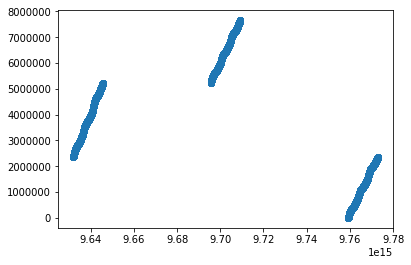

In [16]:
plt.scatter(df_bids.time, df_bids.bid_id)
#df_bids.plot(kind='scatter', x='time', y='bid_id')
plt.show();

There are three distinct time clusters. Add a column in the df to reflect that?

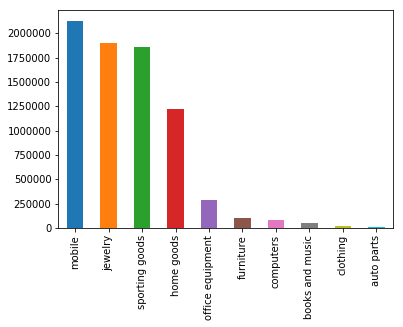

In [14]:
df_bids['bid_id'].value_counts()
df_bids.merchandise.value_counts().plot('bar');

In [18]:
df_bids.sort_values('country')

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
306295,306295,c3d567f4af0d49fa9ddbdeea3bb0445f0ablr,4tuo8,sporting goods,phone49,9760461105263157,ad,88.25.180.179,vasstdc27m7nks3
7157837,7157837,df9c1ff5db85fc35e9cf0d37527d7b39824r2,rimjm,sporting goods,phone90,9706123684210526,ad,123.178.158.59,oi1r0497gyoj9ey
4028705,4028705,b099ba75d90d7bd2d0ec500a4d9d943d11i5i,oifwx,sporting goods,phone664,9640321631578947,ad,111.236.120.192,j5ts1zjkofpafre
201348,201348,e8291466de91b0eb4e1515143c7f74dexy2yr,i1aya,mobile,phone2,9759893578947368,ad,239.105.238.47,vasstdc27m7nks3
5569845,5569845,197e90906939267ace2422e78e8e83889znqp,opnq4,home goods,phone150,9697071736842105,ad,66.36.112.196,vasstdc27m7nks3
7516849,7516849,9655ccc7c0c193f1549475f02c54dce45kjw7,rimjm,sporting goods,phone17,9708550000000000,ad,167.123.51.144,vasstdc27m7nks3
7062392,7062392,197e90906939267ace2422e78e8e83889znqp,opnq4,home goods,phone246,9705503842105263,ad,173.239.93.35,vasstdc27m7nks3
4032212,4032212,b8283dc812128561db043121babe0c8akmmjv,b90b7,home goods,phone82,9640337473684210,ad,60.145.44.100,pg8ruojelm0ptdw
5457320,5457320,8dfc3ccbcf3457a6a0cdecd5279396a1r51ra,opnq4,sporting goods,phone46,9696366947368421,ad,166.139.92.128,vasstdc27m7nks3
5010411,5010411,d95891cf475b0b90d311d169023dd2a0i243n,oifwx,sporting goods,phone2,9644658947368421,ad,178.234.10.221,vasstdc27m7nks3


In [36]:
df_bids.drop(columns = ['log_country'])

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


In [15]:
df_bots = df_bidder.loc[df_bidder['outcome'] == 1.0]

In [16]:
df_bots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 21 to 2001
Data columns (total 4 columns):
bidder_id          103 non-null object
payment_account    103 non-null object
address            103 non-null object
outcome            103 non-null float64
dtypes: float64(1), object(3)
memory usage: 4.0+ KB


In [17]:
df_real_users = df_bidder.loc[df_bidder['outcome'] == 0.0]

In [18]:
df_real_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          1910 non-null object
payment_account    1910 non-null object
address            1910 non-null object
outcome            1910 non-null float64
dtypes: float64(1), object(3)
memory usage: 74.6+ KB


In [19]:
#create a df of real users of same count as bots
df_real_users_103 = df_real_users.sample(103)

In [20]:
df_real_users_103.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 1081 to 202
Data columns (total 4 columns):
bidder_id          103 non-null object
payment_account    103 non-null object
address            103 non-null object
outcome            103 non-null float64
dtypes: float64(1), object(3)
memory usage: 4.0+ KB


In [21]:
frames = [df_bots, df_real_users_103]
df_classification = pd.concat(frames)

In [22]:
df_classification.sample(10)

,bidder_id,payment_account,address,outcome
645,5aae3111e4fab04fa5067c740329a38d11361,02b17d33d7648d7e0dd336ce28cdf1cc6p2tj,19cefea961c939daa5b6f77319fca80d1f7l8,0.0
840,669c6a0e8aabbf0647e8ee6e150c47b18a4pu,be766a0b24441ff657f924e0e2f04964tqwtd,39bc36de464094032410de1e7dbce3c7pfii3,1.0
1462,340d7ea497f16bdb912ec5c6ce467f71kk7hy,a3d2de7675556553a5f08e4c88d2c228y6rim,a3d2de7675556553a5f08e4c88d2c228jsz2h,1.0
1009,2b19566f190ff3b8a85884e03c64fb56ir8a8,a3d2de7675556553a5f08e4c88d2c228zhoc0,a3d2de7675556553a5f08e4c88d2c228dywvn,0.0
539,61101089c1b34f409fc9b836a7f9cd163y22l,a3d2de7675556553a5f08e4c88d2c228paul6,a3d2de7675556553a5f08e4c88d2c2282fqwl,0.0
65,d738b259ec6e6af625d1f41abcfd63e9e53tx,e63a0f17919dec79c46622139cc675c5c6053,05b347f85a3b379667d936a7e7509124q0p4r,0.0
165,3d9910a238a0f282ad3132dd6fc981c8tv3tg,a3d2de7675556553a5f08e4c88d2c2281ehah,c856c4f51e949635cb567f7321bc0c6at1y78,1.0
871,b34fe965c04012fd22123ed948257184pqvfg,a3d2de7675556553a5f08e4c88d2c228eqiew,270a9d13178693751b9e3cce3d7d425ajbx30,1.0
498,6533b670e02ccf583288ba7c8f5fb1carmirt,a3d2de7675556553a5f08e4c88d2c228ez38y,2b8c68d284bc64149c18ac2ba55ff0c9gqlzl,1.0
1734,96dccfc370343f6871dc478d5b2fc3ffx95d3,a3d2de7675556553a5f08e4c88d2c228333u1,794abfcfc9a51569c6415a61a319b352bvmem,0.0


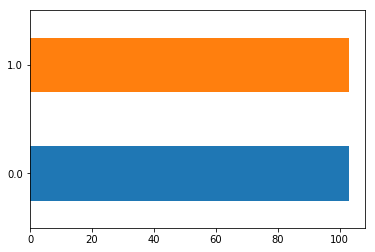

In [23]:
df_classification.outcome.value_counts().plot('barh');

Working with df_classification, create more descriptive features for the data which could later be used for making more acurate predictions

In [24]:
df_classification = pd.merge(df_classification, df_bids, on='bidder_id')

In [25]:
df_classification.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,2519801,1l3p3,mobile,phone65,9632357157894736,id,246.142.185.135,vasstdc27m7nks3
1,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,2543489,62d9x,mobile,phone557,9632435631578947,id,246.142.185.135,vasstdc27m7nks3
2,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,2556174,62d9x,mobile,phone212,9632481315789473,id,246.142.185.135,vasstdc27m7nks3
3,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,2562889,436hc,mobile,phone20,9632506210526315,id,246.142.185.135,vasstdc27m7nks3
4,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,2856456,1l3p3,mobile,phone55,9634184894736842,id,246.142.185.135,vasstdc27m7nks3


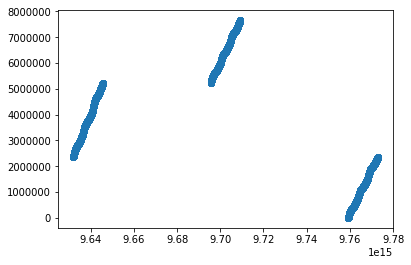

In [26]:
plt.scatter(df_classification.time, df_classification.bid_id)
#df_bids.plot(kind='scatter', x='time', y='bid_id')
plt.show()

In [27]:
print(df_classification.time.max())
print(df_classification.time.min())

df_classification['time'].between(9631916842105263, 9661916842105263, inclusive=False)

9772885210526315
9631916842105263


0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
564709    False
564710    False
564711    False
564712    False
564713    False
564714    False
564715    False
564716    False
564717    False
564718    False
564719    False
564720    False
564721    False
564722    False
564723    False
564724    False
564725    False
564726    False
564727    False
564728    False
564729    False
564730    False
564731    False
564732    False
564733    False
564734    False
564735    False
564736    False
564737    False
564738    False
Name: time, Length: 5647

Same clustering appears in the subset as well.

In [28]:
list(df_classification)

['bidder_id',
 'payment_account',
 'address',
 'outcome',
 'bid_id',
 'auction',
 'merchandise',
 'device',
 'time',
 'country',
 'ip',
 'url']

## Features I would like to add to the data set
* total number of bids per user
* average number of bids per user
* number of bids made at the minimum time delta per user
* number of devices, countries, urls, auctions, ip addresses per user
* average time delta between the times each bidder places a bid (bid frequence sum/total number of bids)

## OR
* total number of bids placed (log)
* total number of auctions of participation (log)
* total number of countries from which bids were placed (log)
* total number of ips from which bids were placed (log)
* total number of urls from which bids were placed (log)
* total number of device types from which bids were placed (log)
* total number of "wins" (last bid placed in auction) (log)
* win percent
* mean bids per auction
* bidding stage (whether bids were placed earlier or later in auction)
* mean time between own bids
* mean time between own bid and the previous bid placed by a competitor
* mean number of competitors per auction of participation


In [29]:
day = (max(df_bids.time) - min(df_bids.time))/31
hours = day/24

print(day)
print(hours)

4547366723259.742
189473613469.1559


In [36]:
category_list = df_classification['merchandise'].unique()
country_list = df_classification['country'].unique()

print(category_list)
print()
print(country_list)

['mobile' 'jewelry' 'office equipment' 'computers' 'books and music'
 'sporting goods' 'home goods' 'furniture']

['id' 'my' 'us' 'tw' 'cn' 'ca' 'ir' 'tr' 'lk' 'in' 'bn' 'th' 'bd' 'ph'
 'sg' 'et' nan 'pk' 'mv' 'sd' 'ma' 'uk' 'gt' 'sa' 'iq' 'vn' 'br' 'de' 'ge'
 'it' 'gh' 'dz' 'az' 'tn' 'au' 'ng' 'om' 'eg' 'es' 'za' 'cr' 'mk' 'gr'
 'ke' 'ly' 'ae' 'kw' 'bh' 'eu' 'hk' 'fr' 'qa' 'md' 'uy' 'kr' 'pt' 'ru'
 'ro' 'zw' 'bg' 'sy' 'mx' 'by' 'ch' 'ht' 'hu' 'ye' 'ar' 'nl' 'no' 'be'
 'fi' 'se' 'dk' 'pa' 'ua' 've' 'sv' 'py' 'il' 'pl' 'jp' 'mr' 'np' 'jo'
 'af' 'zm' 'mw' 'tz' 'ao' 'ml' 'rs' 'ug' 'dj' 'sl' 'na' 'ec' 'cd' 'bo'
 'lb' 'mu' 'so' 'pe' 'tj' 'cy' 'cl' 'am' 'al' 'at' 'me' 'gm' 'sk' 'lu'
 'bf' 'mz' 'la' 'cz' 'ee' 'ie' 'si' 'is' 'nz' 'sz' 'bb' 'tt' 'ne' 'hr'
 'sc' 'sn' 'ls' 'lt' 'ni' 'cm' 'bj' 'mg' 'bw' 'kh' 'mc' 'ci' 'co' 'do'
 'gu' 'mm' 'lv' 'ba' 'td' 'gl' 'cg' 'kz' 'mn' 'pr' 'uz' 'kg' 'bs' 'mo'
 'aw' 'mt' 'jm' 'ps' 'fj' 'je' 'dm' 'ag' 'sr' 'gy' 'vi' 'nc' 'tm' 'pf'
 're' 'li' 'tl' 'tc' 'gb' 'mp'